# Machine Learning - - Serap Aydogdu ( 2019-08-26 )

In [ ]:
# Load libraries
from warnings import filterwarnings
filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns


import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split


from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold,KFold
import lightgbm as lgb

# Data Preparation

- Null Value Check
- Outlier Check
- Standardization
- Variable Transformation
- Feature Engineering

In [115]:
data = pd.read_excel("click_pred_data.xlsx")

In [219]:
df = data.copy()
df.head()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,log_date,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
0,1,3503572,113,0.06,0,1,0,84.90,Thursday,2018-10-11 00:00:00.000,...,-1.11,0.000000e+00,0.0,0.0,ic_anadolu,18,3,Gök Gürültülü Sağnak Yağmur,6.9211,0.08
1,2,921561,437,0.06,1,1,3,83.53,Thursday,2018-10-11 00:00:00.000,...,0.00,0.000000e+00,0.0,0.0,marmara,18,3,Yağmurlu,6.9211,0.17
2,3,4928304,613,0.16,23,4,0,78.87,Thursday,2018-10-11 00:00:00.000,...,1981-11-01 00:00:00,3.750000e+09,1.0,1.0,marmara,18,3,Yağmurlu,6.9211,0.23
3,4,112719,4473,0.08,80,1,4,77.85,Sunday,2018-05-20 00:00:00.000,...,58.59,5.920500e+09,2.0,2.0,ege,25,4,Güneşli,5.4015,0.08
4,5,1625365,520,0.11,6,1,0,74.97,Sunday,2018-06-03 00:00:00.000,...,20.67,3.425850e+09,1.0,1.0,ic_anadolu,11,4,ParçalıBulutlu,5.4238,0.16


In [220]:
df.shape

(800268, 29)

In [221]:
df.sort_values(["log_date","bolge"],ascending=True,inplace=True)


# 1. Variable Transformation

## a. Type Transformation

In [222]:
df.dtypes

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
weekday                 object
log_date                object
hotel_types             object
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
profit                  object
revenue                float64
total_night            float64
total_rooms            float64
bolge                   object
holiday_diff             int64
days_of_holiday          int64
Status                  object
kur                    float64
opp_cpc                float64
dtype: object

**object** means categoric data. Object should be converted Categoric variable. Because it is faster <br/>
**int -->** discrete numeric <br/>
**float -->** ratio numeric <br/>

In [223]:
# # object to date
# df["log_date"] = pd.to_datetime(df["log_date"])

# # object to categorical 
# df["weekday"] = pd.Categorical(df["weekday"])
# df["log_date"] = pd.Categorical(df["log_date"])
# df["hotel_types"] = pd.Categorical(df["hotel_types"])
# df["profit"] = pd.Categorical(df["profit"])
# df["bolge"] = pd.Categorical(df["bolge"])
# df["Status"] = pd.Categorical(df["Status"])

## b. Value Transformation

In [224]:
# df["hotel_types"].unique()

In [225]:
# df.groupby("hotel_types").count()

##### Status

In [226]:
# null values for categorical variables
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
Parçalı Bulutlu                       101090
Güneşli                                89800
Az Bulutlu                             75981
Sağanak Yağış                          65917
Çoğunlukla Bulutlu                     63893
Yağmurlu                               62684
ParçalıBulutlu                         62647
GökGürültülüSağnakYağmur               52950
AzBulutlu                              52297
Gök Gürültülü Sağnak Yağmur            25299
Bulutlu                                23150
ÇoğunluklaBulutlu                      17462
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanakYağış              4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
SağanakYağış                            2464
Yoğun Bulutlu                           1563
Yoğun Kar Fırtınası                     1163
Parçalı Güneşli Kar Fırtınası            365
Rüz

In [227]:
df["Status"] = df["Status"].str.replace('ParçalıBulutlu', 'Parçalı Bulutlu')
df["Status"] = df["Status"].str.replace('AzBulutlu', 'Az Bulutlu')
df["Status"] = df["Status"].str.replace('SağanakYağış', 'Sağanak Yağış')
df["Status"] = df["Status"].str.replace('ÇoğunluklaBulutlu', 'Çoğunlukla Bulutlu')
df["Status"] = df["Status"].str.replace('GökGürültülüSağnakYağmur', 'Gök Gürültülü Sağnak Yağmur')
df["Status"] = df["Status"].str.replace('ParçalıGüneşliSağanakYağış', 'Parçalı Güneşli Sağanak Yağış')
df["Status"] = df["Status"].str.replace('YoğunBulutlu', 'Yoğun Bulutlu')
df["Status"] = df["Status"].str.replace('ÇoğunluklaBulutluSağanakYağışlı', 'Çoğunlukla Bulutlu Kar Yağışlı')
df["Status"] = df["Status"].str.replace('Çoğunlukla BulutluSağanak Yağışlı', 'Çoğunlukla Bulutlu Kar Yağışlı')
df["Status"] = df["Status"].str.replace('Parçalı Güneşli Sağanak Yağış', 'Parçalı Güneşli Sağanak Yağış')

In [228]:
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
Parçalı Bulutlu                       163737
Az Bulutlu                            128278
Güneşli                                89800
Çoğunlukla Bulutlu                     81355
Gök Gürültülü Sağnak Yağmur            78249
Sağanak Yağış                          68381
Yağmurlu                               62684
Bulutlu                                23150
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanak Yağış             4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
Yoğun Bulutlu                           1607
Yoğun Kar Fırtınası                     1163
Çoğunlukla Bulutlu Kar Yağışlı           491
Parçalı Güneşli Kar Fırtınası            365
Rüzgarlı                                 257
Ara Ara Dolu Yağışı                       92
Yoğun Soğuk                               67
Buzlanma                                   4
Nam

##### bolge

In [229]:
df.groupby("bolge")["bolge"].count().sort_values(ascending=False)

bolge
marmara              264243
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
Marmara               50079
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

In [230]:
df["bolge"] = df["bolge"].str.replace('Marmara', 'marmara')

In [231]:
df.groupby("bolge")["bolge"].count().sort_values(ascending=False)

bolge
marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

##### Remove all white spaces from ends and beginings

In [232]:
df["hotel_types"].unique()

array(['Summer ', 'City ', 'Summer'], dtype=object)

In [233]:
# Remove white spaces from both ends and begginings for string values
df["weekday"] = df["weekday"].str.replace(' ', '')
df["hotel_types"] = df["hotel_types"].str.replace(' ', '')
df["bolge"] = df["bolge"].str.replace(' ', '')
df["Status"] = df["Status"].str.replace(' ', '')

In [234]:
df["hotel_types"].unique()

array(['Summer', 'City'], dtype=object)

## c. Label Encoding

In [235]:
# df.dtypes

In [236]:
# df["Status"].fillna("nan",inplace=True) 

In [237]:
# from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# df["weekday"] = lb_make.fit_transform(df["weekday"])
# df["hotel_types"] = lb_make.fit_transform(df["hotel_types"])
# df["bolge"] = lb_make.fit_transform(df["bolge"])
# df["Status"] = lb_make.fit_transform(df["Status"])   # nan is encoded as 18

# df.head()

# 2. Null Values
- Null degerlerin veri setinden cıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda ise rastlantısal olarak olusmus olması gerekir. Eger eksiklikler değişkenlerle ilişkili olarak ortaya cıkan yapısal problemlerle meydaana gelmiş ise bu durumda yapılacak silme işlemi ciddi yanlılıklara sebep olacaktır.

Verisetindeki null degerlerin yapısal bir eksiklik olup olmadığının bilinmesi gerekir. (bir kişinin kredi kartı yoksa, kredi kartı kullanma feature degeri null olacaktır,)

**NA her zaman eksik veri degildir. ( bu kişi kredi kartı var ancak harcama yapmamıssa yine NA olarak dönecebilir. Bu eksiklik degildir, 0 olması gerekirdi, ortalam vs. ile doldurmamak gerekir.)**

Bilgi kaybını göz önünde bulundurmak lazım. (mekanik data degilde, insan davranıslarına ait bilgiler degerlidir. canlıdır. Mekanik bilgiler varyansı düsüktür ve kendi içindeki davrasılar birbirine benzerdir; ancak insan davransılarındaki her bilgi parcacıgı degerlidir. )

Eksik verinin rastlantısallıgını test etme yöntemleri;
- t testi 
- korelasyon testi
- little MCAR testi

**Ya R'da eksik veri test etme methodları kullanılabilir. R Pythonda import edilebilir. (Pythonda bu kütüphane güvenilir degil.) <br/>
Ya da görselleştirme ile eksikliğin tespit edilmesi**

In [238]:
# Is there any null values or not ?
df.isnull().sum()

Id                          0
trivago_id                  0
hotel_impr                  0
avg_cpc                  9050
clicks                      0
booking_value_index         0
stars                       0
rating                      0
weekday                     0
log_date                    0
hotel_types                 0
my_min_position         99086
my_price                99086
top4_min_price            522
total_min_price             0
rival1_price           249698
rival1_min_position    249698
rival2_price           342084
rival2_min_position    342084
profit                  28761
revenue                 28761
total_night             28761
total_rooms             28761
bolge                       0
holiday_diff                0
days_of_holiday             0
Status                  41986
kur                    136970
opp_cpc                 12483
dtype: int64

In [239]:
# How many missing data exist
missing_data=pd.DataFrame(data.isnull().sum().reset_index())

missing_data.columns=["index","missingcount"]
missing_data=missing_data[missing_data["missingcount"]>0]
missing_data['missingper']=(missing_data['missingcount']/data.shape[0])*100
missing_data.sort_values(by="missingper",ascending=True)

,index,missingcount,missingper
13,top4_min_price,522,0.065228
3,avg_cpc,9050,1.130871
28,opp_cpc,12483,1.559852
19,profit,28761,3.593921
20,revenue,28761,3.593921
21,total_night,28761,3.593921
22,total_rooms,28761,3.593921
26,Status,41986,5.246492
11,my_min_position,99086,12.381602
12,my_price,99086,12.381602


In [240]:
# En az bir tane null degeri içeren gözlem sayısı
len(df[df.isnull().any(axis=1)])

584315

In [241]:
# Tüm degerleri tam olan gözlemlere erişmek istersek
len(df[df.notnull().all(axis=1)])

215953

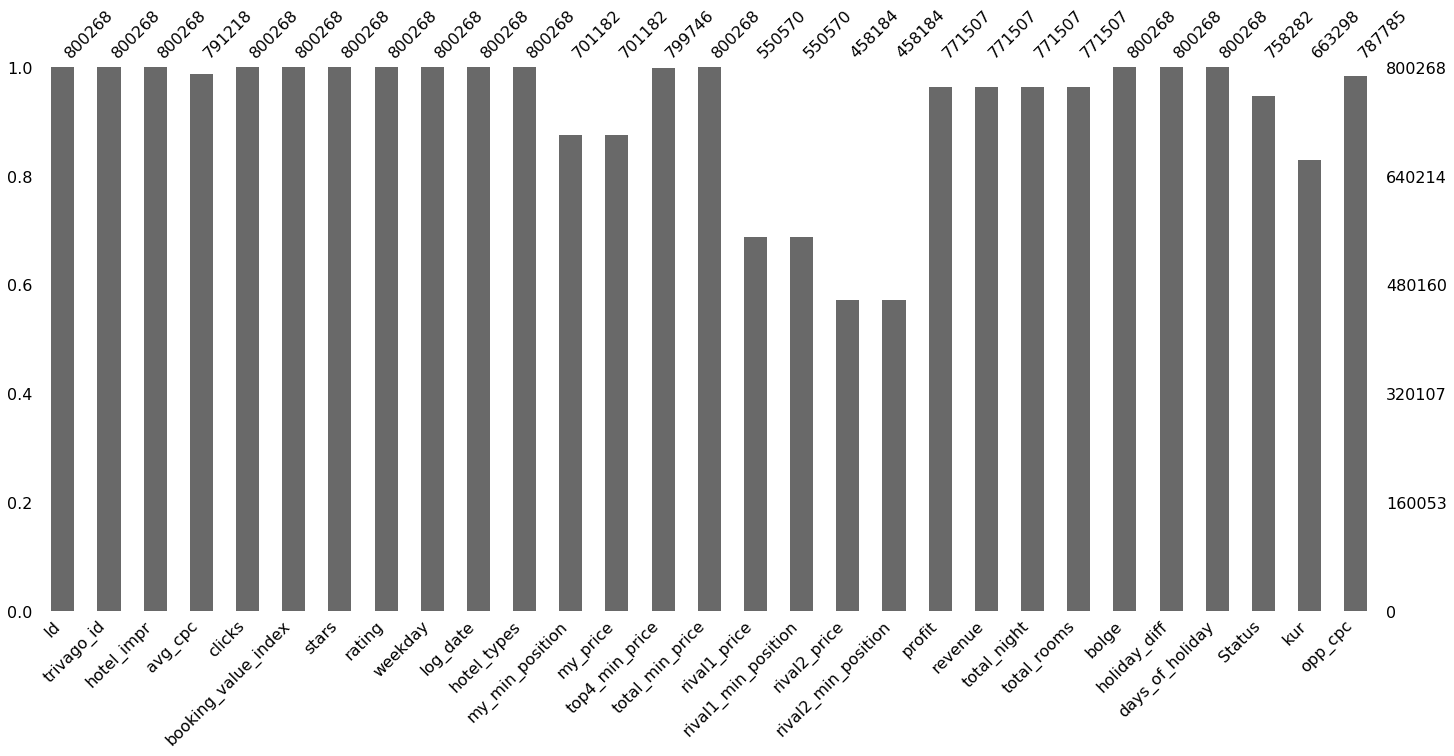

In [242]:
import missingno as msno
%matplotlib inline

msno.bar(df,color="DimGray");

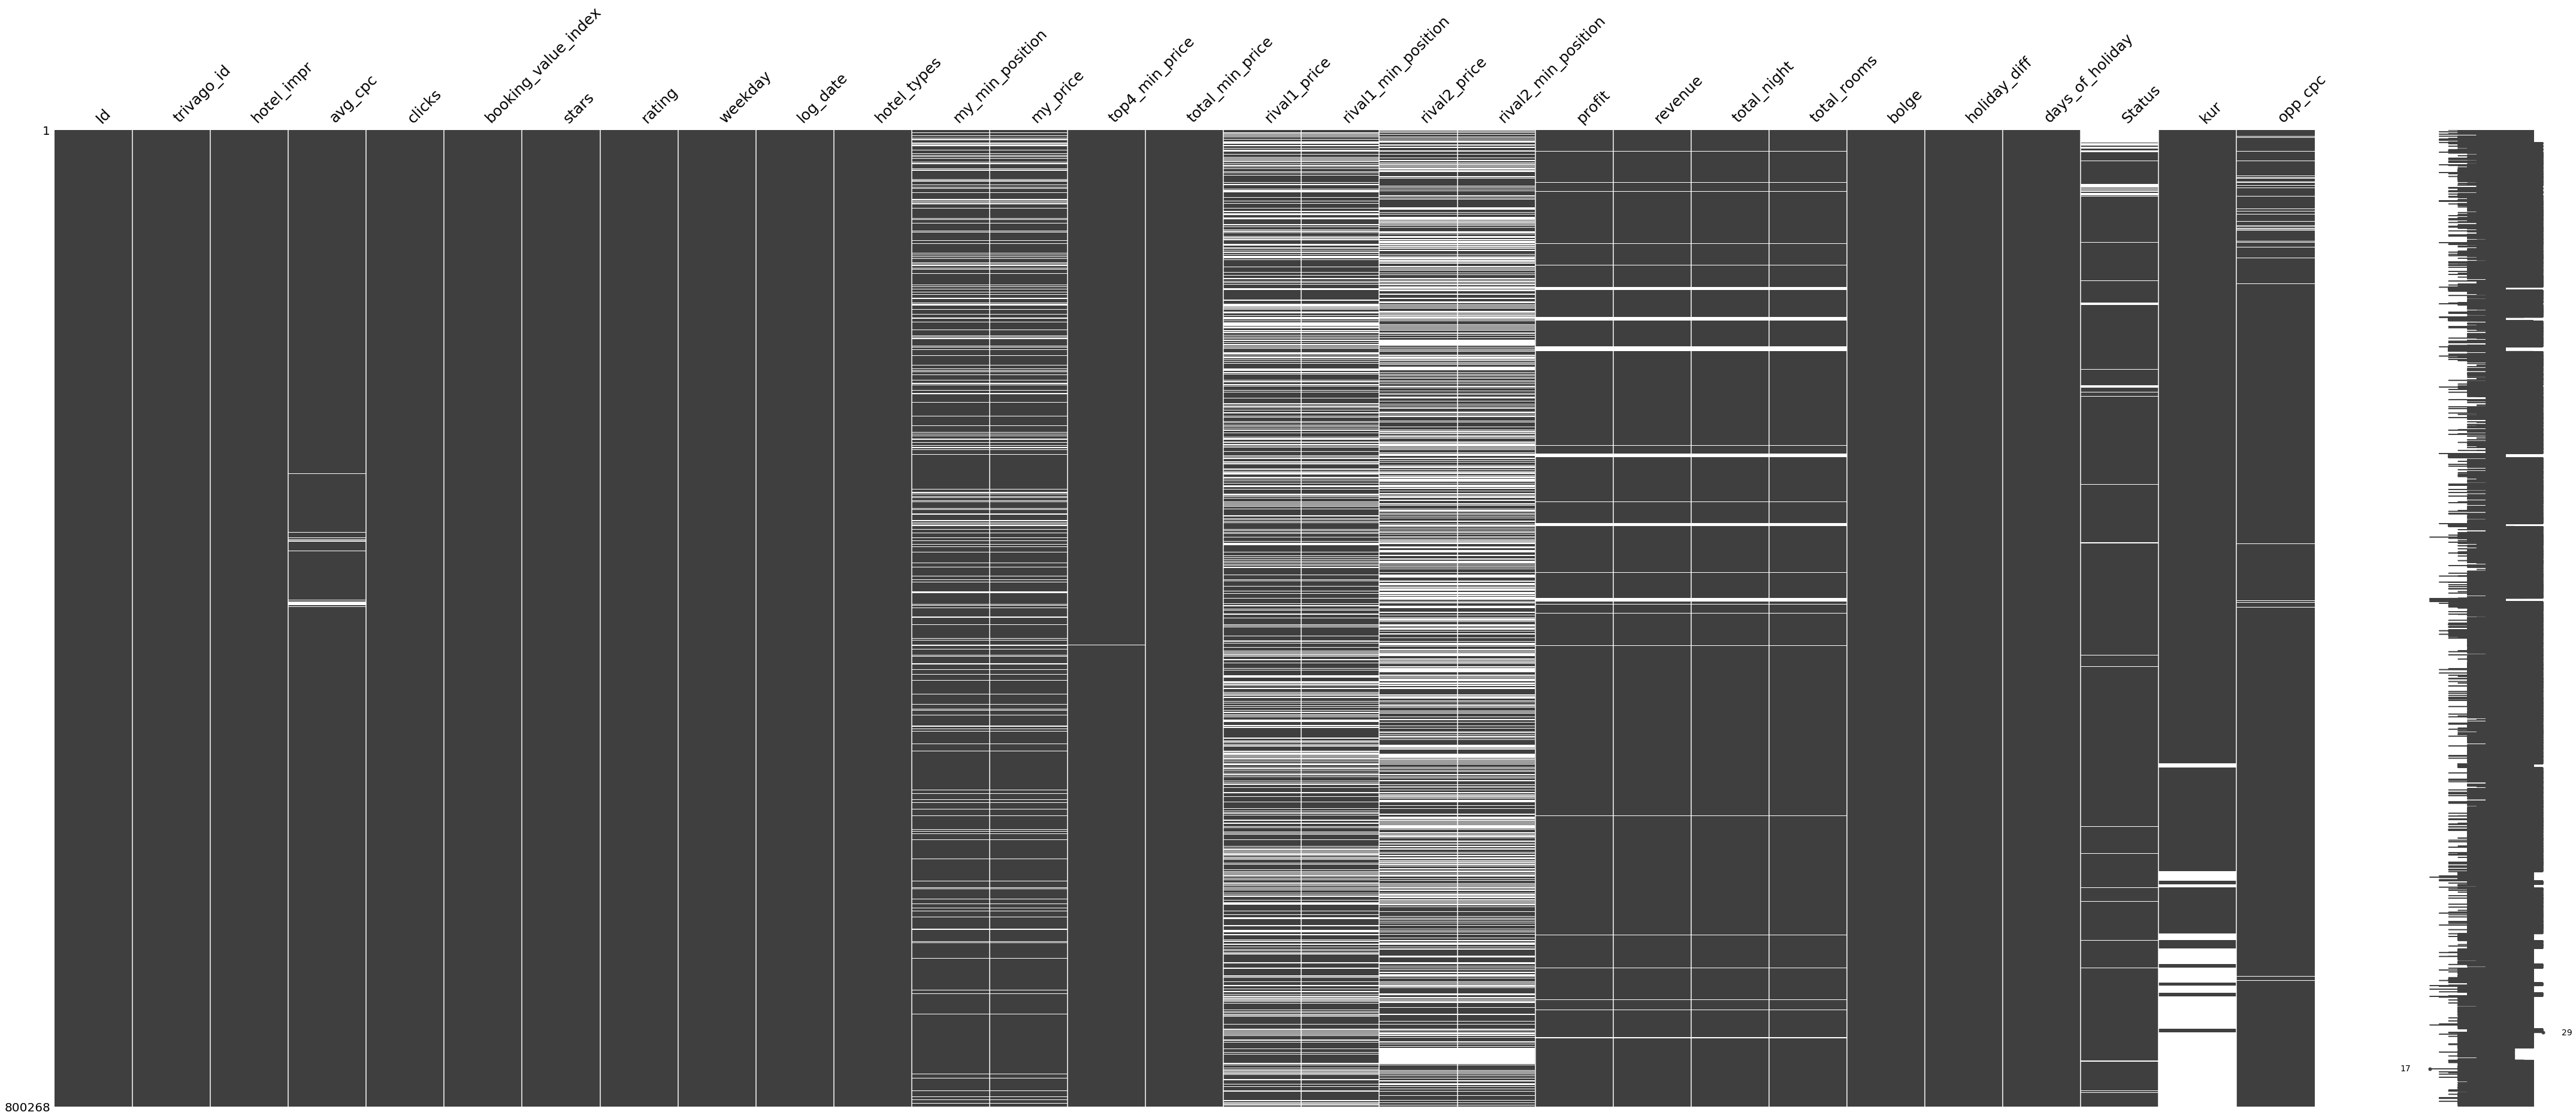

In [243]:
# msno.matrix(df.sample(250))
msno.matrix(df,figsize=(75,30),fontsize=25)

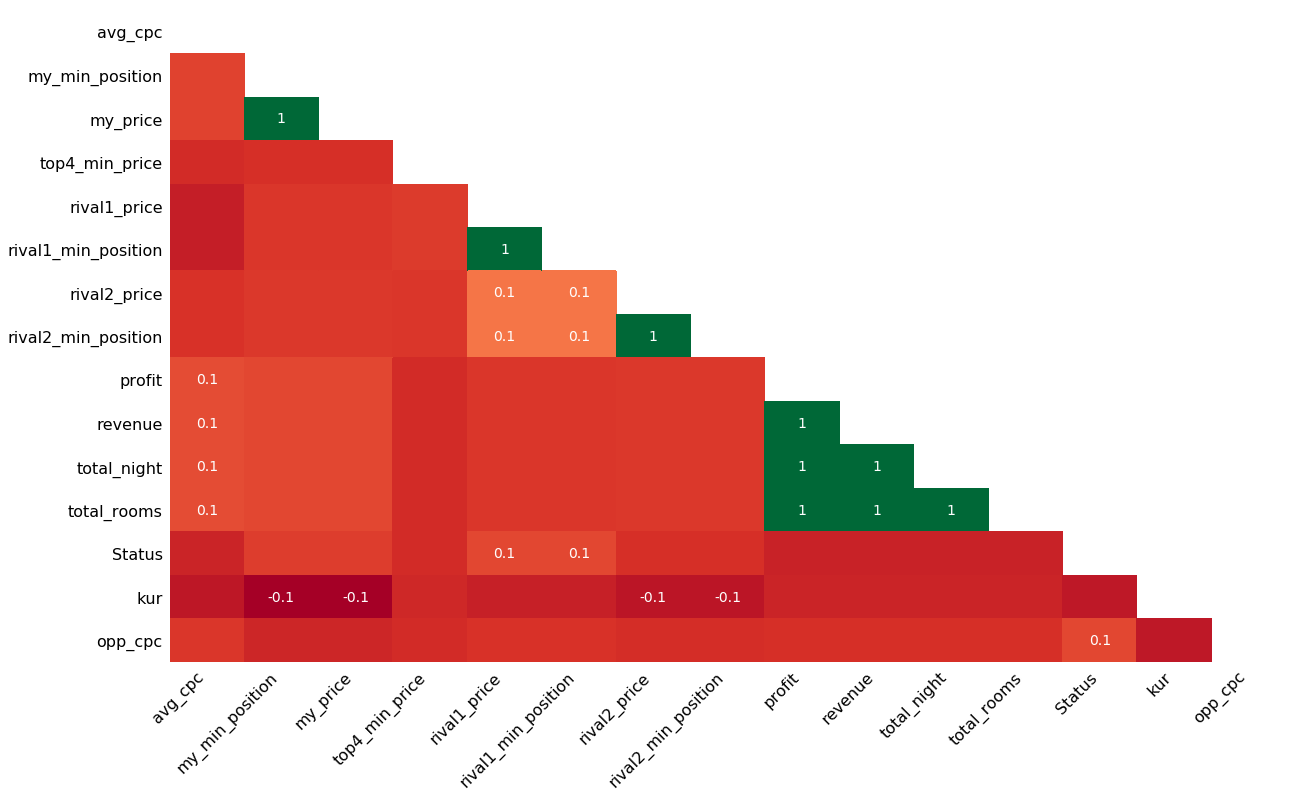

In [244]:
# nullity correlation matrix
msno.heatmap(df,cmap="RdYlGn");

In [245]:
df[["top4_min_price","avg_cpc","opp_cpc","profit","revenue",
    "total_night","total_rooms","Status","my_min_position","my_price","kur",
    "rival1_price","rival1_min_position","rival2_price","rival2_min_position"]].head(10)

,top4_min_price,avg_cpc,opp_cpc,profit,revenue,total_night,total_rooms,Status,my_min_position,my_price,kur,rival1_price,rival1_min_position,rival2_price,rival2_min_position
7279,216.0,0.12,0.14,-23.71,0.0,0.0,0.0,NaN,1.0,242.0,4.992,NaN,NaN,270.0,3.0
7453,478.0,0.15,0.42,-37.97,0.0,0.0,0.0,NaN,1.0,478.0,4.992,NaN,NaN,NaN,NaN
9032,440.0,0.10,0.21,-2.47,0.0,0.0,0.0,NaN,1.0,460.0,4.992,NaN,NaN,NaN,NaN
9202,202.0,0.14,0.16,-6.92,0.0,0.0,0.0,NaN,1.0,202.0,4.992,NaN,NaN,306.0,2.0
9985,510.0,0.22,0.30,-4.08,0.0,0.0,0.0,NaN,2.0,510.0,4.992,NaN,NaN,NaN,NaN
9986,630.0,0.20,0.24,-53.10,0.0,0.0,0.0,NaN,1.0,630.0,4.992,NaN,NaN,NaN,NaN
40893,259.0,0.14,0.16,-31.98,0.0,0.0,0.0,NaN,1.0,381.0,4.992,NaN,NaN,NaN,NaN
41808,242.0,0.03,0.09,0.00,0.0,0.0,0.0,NaN,2.0,242.0,4.992,NaN,NaN,244.0,1.0
41915,163.0,0.04,0.08,-2.72,0.0,0.0,0.0,NaN,1.0,163.0,4.992,NaN,NaN,166.0,2.0
47644,250.0,0.07,0.14,-4.75,0.0,0.0,0.0,NaN,3.0,250.0,4.992,NaN,NaN,240.0,5.0


In [246]:
df[df["top4_min_price"].isnull()].head()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,log_date,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
173726,173727,2655694,45,0.00,0,1,4,68.47,Friday,2018-06-22 00:00:00.000,...,0.00,0.0,0.0,0.0,karadeniz,23,2,ParçalıBulutlu,5.4826,0.04
200919,200920,7372584,1361,0.05,6,1,0,0.00,Wednesday,2018-07-11 00:00:00.000,...,-3.09,0.0,0.0,0.0,marmara,4,2,NaN,5.6287,0.07
261518,261519,1014301,4284,0.02,19,1,0,83.56,Monday,2018-07-16 00:00:00.000,...,0.00,0.0,0.0,0.0,akdeniz,35,9,GökGürültülüSağnakYağmur,5.6651,0.05
344549,344550,4356398,58,0.01,0,1,0,0.00,Thursday,2018-09-27 00:00:00.000,...,-0.19,0.0,0.0,0.0,akdeniz,32,3,ÇoğunluklaBulutlu,7.0989,0.05
345667,345668,2037069,391,0.03,24,1,3,66.02,Thursday,2018-09-27 00:00:00.000,...,-4.63,0.0,0.0,0.0,akdeniz,32,3,ÇoğunluklaBulutlu,7.0989,0.05


# 3. Handling Null Values
- 1. Silme Yöntemi
- 2. Değer atama yöntemi  --> mean,medyan ile doldurma
- 3. Tahmine dayalı yöntemler --> ML yöntemleri (linear ve logistic regression gibi.)

###### 1 . avg_cpc 
bid amount of clicks which will be paid for per click 

In [247]:
df["avg_cpc"].head()

7279    0.12
7453    0.15
9032    0.10
9202    0.14
9985    0.22
Name: avg_cpc, dtype: float64

In [248]:
df.dropna(subset=["avg_cpc"], inplace=True)

###### 2 . opp_cpc 
it indicates the amount of avg_cpc which will be got more clicks.

In [249]:
df["opp_cpc"].head()

7279    0.14
7453    0.42
9032    0.21
9202    0.16
9985    0.30
Name: opp_cpc, dtype: float64

In [250]:
df.dropna(subset=["opp_cpc"], inplace=True)

##### 3. kur
it indicates the currency

In [251]:
df = df.set_index("log_date")
df["kur"].interpolate(inplace=True)
print(len(df[df["kur"].isnull()]))
df.tail(10)

0


,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,hotel_types,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
log_date,,,,,,,,,,,,,,,,,,,,,
2019-01-31 00:00:00.000,802700,1971489,168,0.10,0,5,4,88.13,Thursday,City,...,-1.21,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.13
2019-01-31 00:00:00.000,802701,3376213,430,0.06,1,3,4,70.26,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.09
2019-01-31 00:00:00.000,802702,3485462,84,0.03,0,5,4,85.53,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.07
2019-01-31 00:00:00.000,802704,2568660,39,0.06,0,1,0,79.52,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.08
2019-01-31 00:00:00.000,802705,37563,187,0.03,0,1,4,71.37,Thursday,City,...,-0.18,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.12
2019-01-31 00:00:00.000,802706,3551732,56,0.09,1,4,0,84.63,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.09
2019-01-31 00:00:00.000,802707,5484818,245,0.14,2,4,0,78.71,Thursday,City,...,-14.39,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.22
2019-01-31 00:00:00.000,802708,11033526,30,0.04,0,3,0,0.00,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.04
2019-01-31 00:00:00.000,802710,37627,136,0.08,19,5,3,71.32,Thursday,City,...,-5.80,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.10


In [252]:
df.reset_index(inplace=True);df.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
0,2018-05-02 00:00:00.000,7280,33630,919,0.12,27,4,3,72.01,Wednesday,...,-23.71,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.14
1,2018-05-02 00:00:00.000,7454,97271,1864,0.15,73,5,5,82.13,Wednesday,...,-37.97,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.42
2,2018-05-02 00:00:00.000,9033,159436,1296,0.10,7,2,5,77.07,Wednesday,...,-2.47,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.21
3,2018-05-02 00:00:00.000,9203,33660,1336,0.14,29,5,4,78.20,Wednesday,...,-6.92,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.16
4,2018-05-02 00:00:00.000,9986,3406026,260,0.22,2,5,5,79.00,Wednesday,...,-4.08,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.30


###### 4 . Status
it indicates the weather status 

In [253]:
# null values for categorical variables
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
ParçalıBulutlu                     159789
AzBulutlu                          125267
Güneşli                             85893
ÇoğunluklaBulutlu                   79660
GökGürültülüSağnakYağmur            74283
SağanakYağış                        67786
Yağmurlu                            61034
Bulutlu                             22928
ParçalıGüneşliSağanakYağış          20278
Sisli                               13127
KarYağışlı                          11589
KarlaKarışıkYağmur                   8863
ÇoğunluklaBulutluSağanakYağışlı      4485
YoğunBulutlu                         1604
YoğunKarFırtınası                    1150
ÇoğunluklaBulutluKarYağışlı           479
ParçalıGüneşliKarFırtınası            365
Rüzgarlı                              257
AraAraDoluYağışı                       91
YoğunSoğuk                             67
Buzlanma                                4
Name: Status, dtype: int64

In [256]:
df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 0)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 2)] = 'Bulutlu'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 4)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 5)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'

In [258]:
# df["Status"].fillna(df.groupby(["log_date","bolge"])['Status'].transform("median"), inplace=True)
df["Status"].fillna(df['Status'].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)

In [259]:
# # Null values are random and considerable amount of it. So, we want to predict null values with ML.
# from fancyimpute import KNN
# var_names = list(df.iloc[:,1:])

# knn_imp = KNN(k=3).fit_transform(df.iloc[:,1:])
# # X_filled_knn = KNN(k=2).fit_transform(df[["Status"]])

In [260]:
# from sklearn.preprocessing import Imputer 

# imr = Imputer(missing_values='NaN', strategy='median', axis=0)
# imr = imr.fit(df[['Status']])
# df['Status'] = imr.transform(df[['Status']]).ravel()


###### 5 . total4_min_price
a minimum price which is displayed in the first slot of Trivago.

In [262]:
df[["top4_min_price","total_min_price","rival1_price","rival2_price","my_price"]].head(10)

,top4_min_price,total_min_price,rival1_price,rival2_price,my_price
0,216.0,216,NaN,270.0,242.0
1,478.0,478,NaN,NaN,478.0
2,440.0,435,NaN,NaN,460.0
3,202.0,202,NaN,306.0,202.0
4,510.0,510,NaN,NaN,510.0
5,630.0,630,NaN,NaN,630.0
6,259.0,258,NaN,NaN,381.0
7,242.0,242,NaN,244.0,242.0
8,163.0,163,NaN,166.0,163.0
9,250.0,240,NaN,240.0,250.0


In [263]:
df["top4_min_price"].fillna(df["total_min_price"],inplace=True)

###### 6 . profit
revenue - cost 

In [264]:
df[["profit","revenue","total_night","total_rooms"]].head(10)

,profit,revenue,total_night,total_rooms
0,-23.71,0.0,0.0,0.0
1,-37.97,0.0,0.0,0.0
2,-2.47,0.0,0.0,0.0
3,-6.92,0.0,0.0,0.0
4,-4.08,0.0,0.0,0.0
5,-53.10,0.0,0.0,0.0
6,-31.98,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0
8,-2.72,0.0,0.0,0.0
9,-4.75,0.0,0.0,0.0


In [265]:
df.drop(["profit"],inplace=True,axis=1)

##### 7. total_night /total_tooms/ revenue
- total_night: how many nights in total the specified hotel got a reservation in the specified date
- total_rooms: how many rooms in total the specified hotel got a reservation in the specified date. 

In [266]:
df[["total_night","total_rooms","revenue"]].head(100)

,total_night,total_rooms,revenue
0,0.0,0.0,0.000000e+00
1,0.0,0.0,0.000000e+00
2,0.0,0.0,0.000000e+00
3,0.0,0.0,0.000000e+00
4,0.0,0.0,0.000000e+00
5,0.0,0.0,0.000000e+00
6,0.0,0.0,0.000000e+00
7,0.0,0.0,0.000000e+00
8,0.0,0.0,0.000000e+00
9,0.0,0.0,0.000000e+00


In [267]:
df[["total_night","total_rooms","revenue"]].where((df["revenue"] == 0) & ((df["total_night"] != None) & (df["total_night"] != 0.0))).head(10)

,total_night,total_rooms,revenue
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [269]:
df.dropna(subset=["total_night"], inplace=True)
df.dropna(subset=["total_rooms"], inplace=True)
df.dropna(subset=["revenue"], inplace=True)

##### 8. my_price
OTA's price for the specified hotel. 

In [270]:
# df["my_price"].fillna(df["my_price"].median(),inplace=True)

In [271]:
df.dropna(subset=["my_price"], inplace=True)

##### 9. my_min_position
my_min_position: in which rank OTA's offer is displayed in Trivago.

In [272]:
# df["my_min_position"].fillna(df["my_min_position"].median(),inplace=True)

In [273]:
df.dropna(subset=["my_min_position"], inplace=True)

##### 10. rival1_price
the most important rival's price in that hotel. 

In [274]:
# df["rival1_price"].fillna(df["top4_min_price"],inplace=True)

In [275]:
df.dropna(subset=["rival1_price"], inplace=True)

##### 12. rival1_min_position
the most important rival's offer's position in that hotel. 

In [276]:
# df["rival1_min_position"].fillna(df["rival1_min_position"].median(),inplace=True)

In [277]:
df.dropna(subset=["rival1_min_position"], inplace=True)

##### 13. rival2_price
 the second most important rival's price in that hotel.

In [278]:
# df["rival2_price"].fillna(df["total_min_price"],inplace=True)

In [279]:
df.dropna(subset=["rival2_price"], inplace=True)

##### 14. rival2_min_position
 the second most important rival's offer's position in that hotel. 

In [280]:
# df["rival2_min_position"].fillna(df["rival2_min_position"].median(),inplace=True)
df.dropna(subset=["rival2_min_position"], inplace=True)

In [281]:
# How many missing data exist
missing_data=pd.DataFrame(df.isnull().sum().reset_index())

missing_data.columns=["index","missingcount"]
missing_data=missing_data[missing_data["missingcount"]>0]
missing_data['missingper']=(missing_data['missingcount']/df.shape[0])*100
missing_data.sort_values(by="missingper",ascending=True)

,index,missingcount,missingper


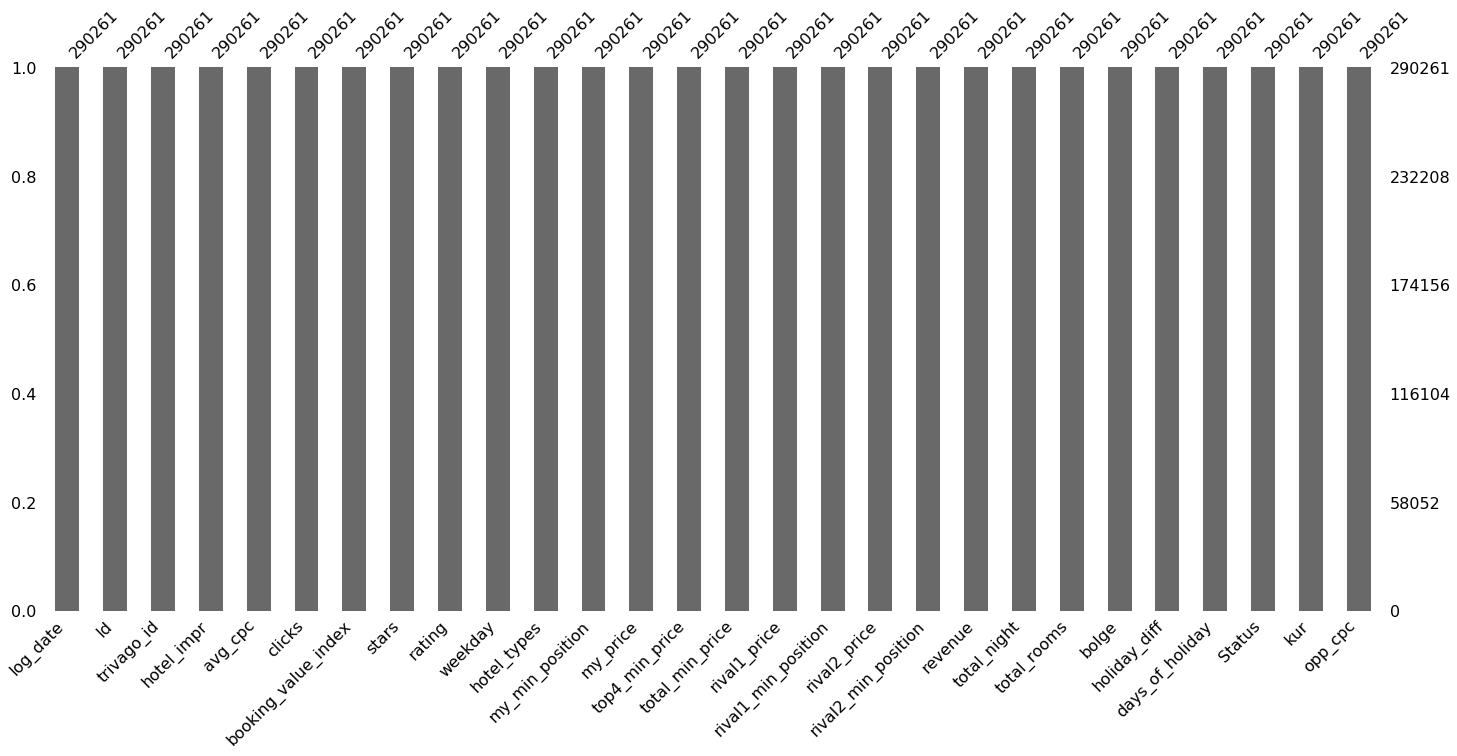

In [282]:
msno.bar(df);

In [283]:
print(len(data))
print(len(df))
print(len(str(data))-len(str(df)))

800268
290261
2047


# 2. Outliers

In [284]:
df_table = df.copy()
df_table.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,rival2_min_position,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
10,2018-05-02 00:00:00.000,49318,3443066,1603,0.14,57,5,5,78.86,Wednesday,...,9.0,1.008150e+10,2.0,2.0,marmara,17,2,ParçalıBulutlu,4.992,0.16
11,2018-05-02 00:00:00.000,49340,4410388,1034,0.08,25,5,0,74.26,Wednesday,...,11.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.18
12,2018-05-02 00:00:00.000,50025,383066,1631,0.06,7,5,5,79.63,Wednesday,...,3.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.18
13,2018-05-02 00:00:00.000,50308,5963554,1424,0.07,7,5,5,83.70,Wednesday,...,3.0,4.525200e+09,1.0,1.0,marmara,17,2,ParçalıBulutlu,4.992,0.22
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,Wednesday,...,3.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.06


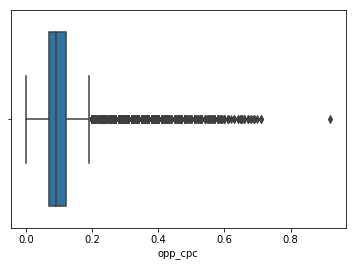

In [285]:
#  Aykırı gözlem için veri analysis kısmında boz plot cizmiştik. Simdi bunu yorumlayalım.
sns.boxplot(x = df_table["opp_cpc"])

In [286]:
num_df.dtypes

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
revenue                float64
total_night            float64
total_rooms            float64
holiday_diff             int64
days_of_holiday          int64
kur                    float64
opp_cpc                float64
dtype: object

In [307]:
df_1 = df_table["clicks"].copy()
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

aykiri_tf = (df_1 < (alt_sinir)) | (df_1 > (ust_sinir))

aykirilar = df_1[aykiri_tf]

print(len(df_table))


# mean_N = df_1.mean()
df_table.drop(index=aykirilar.index,inplace=True)

print(len(aykirilar))  
print(len(df_table))  

102622
9339
93283


In [308]:
len(df_table)

93283

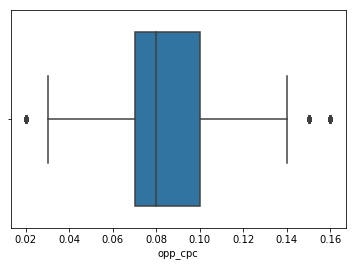

In [309]:
#  Aykırı gözlem için veri analysis kısmında boz plot cizmiştik. Simdi bunu yorumlayalım.
sns.boxplot(x = df_table["opp_cpc"])

# 3. One Hot Encoding

In [323]:
df_enc = df_table.copy()
df_enc.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,rival2_min_position,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,Wednesday,...,3.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.06
36,2018-05-02 00:00:00.000,127044,5706890,5,0.01,0,1,0,79.00,Wednesday,...,2.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.15
44,2018-05-02 00:00:00.000,147366,2111186,209,0.02,0,2,4,79.00,Wednesday,...,4.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.04
49,2018-05-02 00:00:00.000,190485,1965721,196,0.01,0,1,3,77.91,Wednesday,...,1.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.09
50,2018-05-02 00:00:00.000,230125,2111136,211,0.12,2,5,4,80.00,Wednesday,...,3.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.14


In [324]:
#Dropping prediction columns SalePrice. Also Id column which will not be used. 
X = df_enc.drop(["log_date","clicks"],axis=1)
y = df_enc["clicks"]

In [325]:
# We droped the first column of each category turned into dummies columns.
X=pd.get_dummies(X, columns=["weekday",
                             "hotel_types",
                             "bolge",
                             "Status"
                            ], drop_first=True)

In [326]:
X.head()

,Id,trivago_id,hotel_impr,avg_cpc,booking_value_index,stars,rating,my_min_position,my_price,top4_min_price,...,Status_Rüzgarlı,Status_SağanakYağış,Status_Sisli,Status_Yağmurlu,Status_YoğunBulutlu,Status_YoğunKarFırtınası,Status_YoğunSoğuk,Status_ÇoğunluklaBulutlu,Status_ÇoğunluklaBulutluKarYağışlı,Status_ÇoğunluklaBulutluSağanakYağışlı
29,106404,4528346,206,0.04,1,0,79.00,2.0,179.0,179.0,...,0,0,0,0,0,0,0,0,0,0
36,127044,5706890,5,0.01,1,0,79.00,3.0,271.0,263.0,...,0,0,0,0,0,0,0,0,0,0
44,147366,2111186,209,0.02,2,4,79.00,3.0,165.0,165.0,...,0,0,0,0,0,0,0,0,0,0
49,190485,1965721,196,0.01,1,3,77.91,6.0,238.0,210.0,...,0,0,0,0,0,0,0,0,0,0
50,230125,2111136,211,0.12,5,4,80.00,2.0,166.0,166.0,...,0,0,0,0,0,0,0,0,0,0


# 4. Standardization

In [327]:
data_scale = X.copy()

In [328]:
data_scale.head()

,Id,trivago_id,hotel_impr,avg_cpc,booking_value_index,stars,rating,my_min_position,my_price,top4_min_price,...,Status_Rüzgarlı,Status_SağanakYağış,Status_Sisli,Status_Yağmurlu,Status_YoğunBulutlu,Status_YoğunKarFırtınası,Status_YoğunSoğuk,Status_ÇoğunluklaBulutlu,Status_ÇoğunluklaBulutluKarYağışlı,Status_ÇoğunluklaBulutluSağanakYağışlı
29,106404,4528346,206,0.04,1,0,79.00,2.0,179.0,179.0,...,0,0,0,0,0,0,0,0,0,0
36,127044,5706890,5,0.01,1,0,79.00,3.0,271.0,263.0,...,0,0,0,0,0,0,0,0,0,0
44,147366,2111186,209,0.02,2,4,79.00,3.0,165.0,165.0,...,0,0,0,0,0,0,0,0,0,0
49,190485,1965721,196,0.01,1,3,77.91,6.0,238.0,210.0,...,0,0,0,0,0,0,0,0,0,0
50,230125,2111136,211,0.12,5,4,80.00,2.0,166.0,166.0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = X.values
# Separating out the target
y = y.values
# Standardizing the features
X = StandardScaler().fit_transform(X)
X

array([[-1.4501099 ,  0.60028566, -0.44436684, ..., -0.38522108,
        -0.0274038 , -0.09039131],
       [-1.36641791,  1.1124491 , -1.0156125 , ..., -0.38522108,
        -0.0274038 , -0.09039131],
       [-1.28401537, -0.45014689, -0.43584079, ..., -0.38522108,
        -0.0274038 , -0.09039131],
       ...,
       [ 1.37321733, -0.78676586, -0.8905637 , ..., -0.38522108,
        -0.0274038 , -0.09039131],
       [ 1.37323355,  0.3577913 , -0.53531143, ..., -0.38522108,
        -0.0274038 , -0.09039131],
       [ 1.37330248, -1.35125972, -0.64330812, ..., -0.38522108,
        -0.0274038 , -0.09039131]])

# 4. Splitting

In [330]:
# Let's then do a train/test split. (80% - 20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

# 5. Modelling

## a. Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
scores=cross_val_score(lr,X_train,y_train,n_jobs=-1,cv=10,scoring='r2')
lr.fit(X_train,y_train)
print('R2: ',np.sqrt(scores).mean())

R2:  0.602300767574361


In [186]:
X_train.shape

(99736, 54)

In [188]:
y_train.shape

(99736,)

In [204]:
# Prediction
y_pred = lr.predict(X_test)

In [205]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(test_set_rmse)

test_set_r2 = r2_score(y_test, y_pred)
print("R2 score: "+str(test_set_r2))

12.796899247782118
R2 score: 0.3445146430883044


## b. PLS

In [206]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [207]:
pls_model = PLSRegression().fit(X_train, y_train)

In [208]:
pls_model.predict(X_train)[0:10]

array([[-2.64892234],
       [ 3.46788241],
       [ 7.45975165],
       [ 5.30993864],
       [ 8.58715862],
       [18.11293214],
       [19.38204123],
       [ 4.31284113],
       [ 5.96837206],
       [ 7.97504834]])

In [209]:
y_pred = pls_model.predict(X_train)

In [210]:
np.sqrt(mean_squared_error(y_train, y_pred))

12.67310744855045

In [211]:
r2_score(y_train, y_pred)

0.3432836658066786

In [212]:
y_pred = pls_model.predict(X_test)

In [213]:
np.sqrt(mean_squared_error(y_test, y_pred))

12.995002257304533

In [214]:
r2_score(y_test, y_pred)

0.3240630130545299

## c. Gradient Boosting 

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [216]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

11.321004848387034

In [217]:
r2_score(y_test, y_pred)

0.4869928173991659

## d. XGBoosting

In [218]:
import xgboost as xgb

DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

from xgboost import XGBRegressor

xgb_model = XGBRegressor().fit(X_train, y_train)

[13:28:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [219]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

0.4855090974256364

## e. Light GBM 

In [220]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [221]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

np.sqrt(mean_squared_error(y_test, y_pred))

10.183388362340713

In [222]:
r2_score(y_test, y_pred)

0.5849139803349732

 #### Model Tuning 1

In [228]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [229]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [230]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 75.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 100.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 126.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 163.1min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 220.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 272.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 328.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks  

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': 

In [231]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000}

In [232]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 1000,
                           colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [233]:
y_pred = lgbm_tuned.predict(X_test)

In [234]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.414678000656457

In [235]:
r2_score(y_test, y_pred)

0.6452156659233682

#### Model Tunning 2

In [298]:
lgbm_grid2 = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.1],
    'n_estimators': [20, 40, 100, 200, 500,1000,1500,2000,3500],
    'max_depth': [9,10,11,12] }

lgbm2 = LGBMRegressor()
lgbm_cv_model2 = GridSearchCV(lgbm2, lgbm_grid2, cv=3, n_jobs = -1, verbose = 2)

In [299]:
lgbm_cv_model2.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 30.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1], 'max_depth': [9, 10, 11],
                         'n

In [300]:
lgbm_cv_model2.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 11,
 'n_estimators': 2000}

In [301]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 11, 
                           n_estimators = 2000,
                           colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [302]:
y_pred = lgbm_tuned.predict(X_test)

In [303]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.102252660988192

In [304]:
r2_score(y_test, y_pred)

0.6683719433423514

## f. CatBoost

In [223]:
from catboost import CatBoostRegressor

In [224]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

0:	learn: 17.3533354	total: 206ms	remaining: 3m 25s
1:	learn: 17.0774870	total: 251ms	remaining: 2m 5s
2:	learn: 16.8145528	total: 307ms	remaining: 1m 41s
3:	learn: 16.5619761	total: 353ms	remaining: 1m 27s
4:	learn: 16.3272482	total: 415ms	remaining: 1m 22s
5:	learn: 16.0981584	total: 469ms	remaining: 1m 17s
6:	learn: 15.8786002	total: 514ms	remaining: 1m 12s
7:	learn: 15.6690099	total: 585ms	remaining: 1m 12s
8:	learn: 15.4688962	total: 643ms	remaining: 1m 10s
9:	learn: 15.2766721	total: 700ms	remaining: 1m 9s
10:	learn: 15.0964860	total: 759ms	remaining: 1m 8s
11:	learn: 14.9224919	total: 814ms	remaining: 1m 7s
12:	learn: 14.7587193	total: 885ms	remaining: 1m 7s
13:	learn: 14.5987245	total: 959ms	remaining: 1m 7s
14:	learn: 14.4453598	total: 1.02s	remaining: 1m 6s
15:	learn: 14.2979653	total: 1.11s	remaining: 1m 8s
16:	learn: 14.1628644	total: 1.19s	remaining: 1m 9s
17:	learn: 14.0291954	total: 1.25s	remaining: 1m 8s
18:	learn: 13.9034030	total: 1.31s	remaining: 1m 7s
19:	learn: 13.

158:	learn: 10.8773886	total: 8.19s	remaining: 43.3s
159:	learn: 10.8761142	total: 8.24s	remaining: 43.2s
160:	learn: 10.8700406	total: 8.28s	remaining: 43.1s
161:	learn: 10.8663949	total: 8.32s	remaining: 43s
162:	learn: 10.8629648	total: 8.35s	remaining: 42.9s
163:	learn: 10.8587945	total: 8.39s	remaining: 42.8s
164:	learn: 10.8551560	total: 8.45s	remaining: 42.8s
165:	learn: 10.8533911	total: 8.49s	remaining: 42.6s
166:	learn: 10.8490141	total: 8.53s	remaining: 42.5s
167:	learn: 10.8459376	total: 8.56s	remaining: 42.4s
168:	learn: 10.8419229	total: 8.61s	remaining: 42.3s
169:	learn: 10.8373749	total: 8.64s	remaining: 42.2s
170:	learn: 10.8330727	total: 8.7s	remaining: 42.2s
171:	learn: 10.8307793	total: 8.74s	remaining: 42.1s
172:	learn: 10.8272416	total: 8.79s	remaining: 42s
173:	learn: 10.8218637	total: 8.83s	remaining: 41.9s
174:	learn: 10.8194224	total: 8.87s	remaining: 41.8s
175:	learn: 10.8137610	total: 8.91s	remaining: 41.7s
176:	learn: 10.8100282	total: 8.96s	remaining: 41.7

317:	learn: 10.4389111	total: 15.4s	remaining: 33s
318:	learn: 10.4377807	total: 15.4s	remaining: 32.9s
319:	learn: 10.4360914	total: 15.4s	remaining: 32.8s
320:	learn: 10.4344729	total: 15.5s	remaining: 32.8s
321:	learn: 10.4307615	total: 15.5s	remaining: 32.7s
322:	learn: 10.4290313	total: 15.6s	remaining: 32.6s
323:	learn: 10.4278638	total: 15.6s	remaining: 32.6s
324:	learn: 10.4245821	total: 15.7s	remaining: 32.6s
325:	learn: 10.4230402	total: 15.7s	remaining: 32.5s
326:	learn: 10.4220539	total: 15.8s	remaining: 32.4s
327:	learn: 10.4192154	total: 15.8s	remaining: 32.4s
328:	learn: 10.4163175	total: 15.8s	remaining: 32.3s
329:	learn: 10.4132561	total: 15.9s	remaining: 32.3s
330:	learn: 10.4112916	total: 15.9s	remaining: 32.2s
331:	learn: 10.4094084	total: 16s	remaining: 32.1s
332:	learn: 10.4081133	total: 16s	remaining: 32.1s
333:	learn: 10.4061780	total: 16.1s	remaining: 32s
334:	learn: 10.4035485	total: 16.1s	remaining: 32s
335:	learn: 10.4027836	total: 16.1s	remaining: 31.9s
336

476:	learn: 10.1622386	total: 22.4s	remaining: 24.6s
477:	learn: 10.1612191	total: 22.5s	remaining: 24.5s
478:	learn: 10.1602261	total: 22.5s	remaining: 24.5s
479:	learn: 10.1577130	total: 22.6s	remaining: 24.4s
480:	learn: 10.1568777	total: 22.6s	remaining: 24.4s
481:	learn: 10.1552609	total: 22.6s	remaining: 24.3s
482:	learn: 10.1539874	total: 22.7s	remaining: 24.3s
483:	learn: 10.1516920	total: 22.7s	remaining: 24.2s
484:	learn: 10.1503796	total: 22.8s	remaining: 24.2s
485:	learn: 10.1485316	total: 22.8s	remaining: 24.1s
486:	learn: 10.1475836	total: 22.8s	remaining: 24.1s
487:	learn: 10.1463377	total: 22.9s	remaining: 24s
488:	learn: 10.1444707	total: 22.9s	remaining: 24s
489:	learn: 10.1429012	total: 23s	remaining: 23.9s
490:	learn: 10.1421248	total: 23s	remaining: 23.8s
491:	learn: 10.1404360	total: 23s	remaining: 23.8s
492:	learn: 10.1395609	total: 23.1s	remaining: 23.7s
493:	learn: 10.1374555	total: 23.1s	remaining: 23.7s
494:	learn: 10.1365701	total: 23.2s	remaining: 23.6s
495

634:	learn: 9.9393790	total: 29.2s	remaining: 16.8s
635:	learn: 9.9380975	total: 29.3s	remaining: 16.8s
636:	learn: 9.9376527	total: 29.3s	remaining: 16.7s
637:	learn: 9.9359409	total: 29.3s	remaining: 16.7s
638:	learn: 9.9351781	total: 29.4s	remaining: 16.6s
639:	learn: 9.9343022	total: 29.4s	remaining: 16.5s
640:	learn: 9.9337541	total: 29.5s	remaining: 16.5s
641:	learn: 9.9325293	total: 29.5s	remaining: 16.5s
642:	learn: 9.9304865	total: 29.5s	remaining: 16.4s
643:	learn: 9.9286706	total: 29.6s	remaining: 16.4s
644:	learn: 9.9273142	total: 29.6s	remaining: 16.3s
645:	learn: 9.9269445	total: 29.7s	remaining: 16.3s
646:	learn: 9.9248944	total: 29.7s	remaining: 16.2s
647:	learn: 9.9220522	total: 29.7s	remaining: 16.2s
648:	learn: 9.9215651	total: 29.8s	remaining: 16.1s
649:	learn: 9.9203637	total: 29.8s	remaining: 16.1s
650:	learn: 9.9191819	total: 29.9s	remaining: 16s
651:	learn: 9.9183628	total: 29.9s	remaining: 16s
652:	learn: 9.9167485	total: 29.9s	remaining: 15.9s
653:	learn: 9.91

796:	learn: 9.7482871	total: 35.8s	remaining: 9.13s
797:	learn: 9.7469129	total: 35.9s	remaining: 9.08s
798:	learn: 9.7462881	total: 35.9s	remaining: 9.04s
799:	learn: 9.7456159	total: 36s	remaining: 8.99s
800:	learn: 9.7448079	total: 36s	remaining: 8.94s
801:	learn: 9.7436496	total: 36s	remaining: 8.9s
802:	learn: 9.7422167	total: 36.1s	remaining: 8.85s
803:	learn: 9.7414098	total: 36.1s	remaining: 8.81s
804:	learn: 9.7406323	total: 36.2s	remaining: 8.76s
805:	learn: 9.7392720	total: 36.2s	remaining: 8.71s
806:	learn: 9.7377672	total: 36.2s	remaining: 8.67s
807:	learn: 9.7373186	total: 36.3s	remaining: 8.62s
808:	learn: 9.7362859	total: 36.3s	remaining: 8.57s
809:	learn: 9.7343297	total: 36.4s	remaining: 8.53s
810:	learn: 9.7328310	total: 36.4s	remaining: 8.48s
811:	learn: 9.7313695	total: 36.4s	remaining: 8.44s
812:	learn: 9.7308548	total: 36.5s	remaining: 8.39s
813:	learn: 9.7288712	total: 36.5s	remaining: 8.35s
814:	learn: 9.7281881	total: 36.6s	remaining: 8.3s
815:	learn: 9.727528

956:	learn: 9.5782365	total: 42.2s	remaining: 1.9s
957:	learn: 9.5775271	total: 42.3s	remaining: 1.85s
958:	learn: 9.5771188	total: 42.3s	remaining: 1.81s
959:	learn: 9.5762453	total: 42.4s	remaining: 1.76s
960:	learn: 9.5757284	total: 42.4s	remaining: 1.72s
961:	learn: 9.5745833	total: 42.4s	remaining: 1.68s
962:	learn: 9.5740262	total: 42.5s	remaining: 1.63s
963:	learn: 9.5728983	total: 42.5s	remaining: 1.59s
964:	learn: 9.5725537	total: 42.6s	remaining: 1.54s
965:	learn: 9.5711133	total: 42.6s	remaining: 1.5s
966:	learn: 9.5707110	total: 42.6s	remaining: 1.46s
967:	learn: 9.5701918	total: 42.7s	remaining: 1.41s
968:	learn: 9.5684862	total: 42.7s	remaining: 1.37s
969:	learn: 9.5649106	total: 42.8s	remaining: 1.32s
970:	learn: 9.5629167	total: 42.8s	remaining: 1.28s
971:	learn: 9.5619994	total: 42.8s	remaining: 1.23s
972:	learn: 9.5612671	total: 42.9s	remaining: 1.19s
973:	learn: 9.5607350	total: 42.9s	remaining: 1.15s
974:	learn: 9.5603555	total: 43s	remaining: 1.1s
975:	learn: 9.559

In [226]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

10.570148144253126

In [227]:
r2_score(y_test, y_pred)

0.5527857419954173

## Artifical Neural Network

In [262]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
X.head()

,Id,trivago_id,hotel_impr,avg_cpc,booking_value_index,stars,rating,my_min_position,my_price,top4_min_price,...,Status_Rüzgarlı,Status_SağanakYağış,Status_Sisli,Status_Yağmurlu,Status_YoğunBulutlu,Status_YoğunKarFırtınası,Status_YoğunSoğuk,Status_ÇoğunluklaBulutlu,Status_ÇoğunluklaBulutluKarYağışlı,Status_ÇoğunluklaBulutluSağanakYağışlı
29,106404,4528346,206,0.04,1,0,79.00,2.0,179.0,179.0,...,0,0,0,0,0,0,0,0,0,0
36,127044,5706890,5,0.01,1,0,79.00,3.0,271.0,263.0,...,0,0,0,0,0,0,0,0,0,0
44,147366,2111186,209,0.02,2,4,79.00,3.0,165.0,165.0,...,0,0,0,0,0,0,0,0,0,0
49,190485,1965721,196,0.01,1,3,77.91,6.0,238.0,210.0,...,0,0,0,0,0,0,0,0,0,0
50,230125,2111136,211,0.12,5,4,80.00,2.0,166.0,166.0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
# Let's then do a train/test split. (80% - 20%)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [265]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative explained variance')

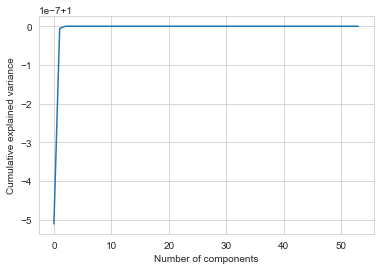

In [266]:
pca = PCA(n_components=54)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [267]:
#In plot above we can see that cumulative explained variance is very high near 20
#we chose NCOMPONENTS as 20
#That means that data describing changes is mostly contained in 20 components
NCOMPONENTS = 54

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(99736, 54)
(99736, 54)


In [268]:
pca_std = np.std(X_sc_train)
pca_std

0.9999999999999997

In [269]:
print(X_sc_train.shape)
print(X_sc_train.shape)

(99736, 54)
(99736, 54)


In [270]:
y_train_pca = y_train.values.astype('int32').reshape(-1,1)
print(y_train_pca.shape)

(99736, 1)


In [ ]:

# #PCA is effected by scale so we scaled the features in the data before applying PCA. 
# # transforming the data onto unit scale (mean = 0 and variance = 1) 
# # which is a requirement for the optimal performance of many machine learning algorithms
# pca = PCA(n_components=30)
# pca.fit(X_train)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [ ]:
# #In plot above we can see that cumulative explained variance is very high near 20
# #we chose NCOMPONENTS as 20
# #That means that data describing changes is mostly contained in 20 components
# NCOMPONENTS = 20

# pca = PCA(n_components=NCOMPONENTS)
# X_pca_train = pca.fit_transform(X_train)
# X_pca_test = pca.transform(X_test)
# pca_std = np.std(X_train)

# print(X_sc_train.shape)
# print(X_pca_train.shape)

In [273]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_pca_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1024, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               7040      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 171,905
Trainable params: 171,905
Non-trainable params: 0
_________________________________________________________________


In [275]:
y_train_pca.shape

(99736, 1)

In [277]:
NN_model.fit(X_pca_train, y_train_pca, epochs=20, batch_size=32, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 79788 samples, validate on 19948 samples
Epoch 1/20
79788/79788 [==============================] - 61s 758us/step - loss: 5.4098 - acc: 0.2942 - val_loss: 5.0670 - val_acc: 0.3030
Epoch 2/20
79788/79788 [==============================] - 15s 186us/step - loss: 5.0656 - acc: 0.3041 - val_loss: 5.3207 - val_acc: 0.2724
Epoch 3/20
79788/79788 [==============================] - 13s 159us/step - loss: 4.9415 - acc: 0.3032 - val_loss: 4.9460 - val_acc: 0.2969
Epoch 4/20
79788/79788 [==============================] - 13s 167us/step - loss: 4.8395 - acc: 0.3077 - val_loss: 4.8836 - val_acc: 0.3008
Epoch 5/20
79788/79788 [==============================] - 12s 154us/step - loss: 4.7559 - acc: 0.3103 - val_loss: 4.9294 - val_acc: 0.3096
Epoch 6/20
79788/79788 [==============================] - 13s 159us/step - loss: 4.6960 - acc: 0.3111 - val_loss: 4.9099 - val_acc: 0.3034
Epoch 7/20
79788/79788 [==============================] - 13s 158us/

Accuracy for ANN is quite bad. 